<a href="https://colab.research.google.com/github/Jpalmer95/Jpalmer95/blob/main/JPK_ML_Full_Code_notebook_Project2_AllLife_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Ignore warnings for a clean look
import warnings
warnings.filterwarnings("ignore")

# import libraries & packages
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# For data viz
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

# To split data
from sklearn.model_selection  import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

In [2]:
# installing a package to help categorize and utilize the zip code information
!pip install uszipcode

## Loading the dataset

In [3]:
# Load the csv dataset as a pandas dataframe and check typeSu

df = pd.read_csv("Loan_Modelling.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Data Overview

In [4]:
# verifying the missing count
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
# checking dataframe shape
df.shape

(5000, 14)

In [6]:
# veiwing datafrome column layout for the first 5 rows
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

Observations:

* The DataFrame has 14 columns. Data in each row corresponds to each customer ID.


Sanity checks:


*   There are no missing values in any column.
*   *Education column we will have to be ome hot encoded since it has 3 categorical values.



## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
* min = 0, max = 635k, and mean = 56.5k
* The mortgage appears to be highly right skewed with nearly 75% of mortgage values under 100k and a max of 635k

2. How many customers have credit cards?
* 1470 customers

3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
* personal loan has a strong positive correlation (0.5) with income followed by positive correlations with CC_Avg (0.37) and CD_Account (0.32).

4. How does a customer's interest in purchasing a loan vary with their age?
* Age does not appear to be a significant factor in purchasing a loan. However the majority of loans in this dataframe are secured between the ages of 30-60 years.

5. How does a customer's interest in purchasing a loan vary with their education?
* A customers interest in purchasing a loan increases reasonably as their education level increases.
* Education Level correlation to interest in purchasing a loan:
 * 1: Undergrad = -0.15
 * 2: Graduate = .071
 * 3: Advanced/Professional = .09

* **Additional observation**: as income increases, CC_Avg significantly increases which we can tell by the strong correlation of (0.65) between the two variables.

In [7]:
# The .describe() method will give us a statistical summary of the data.
df.describe()

ID          Age   Experience       Income       ZIPCode  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93169.257000   
std    1443.520003    11.463166    11.467954    46.033729   1759.455086   
min       1.000000    23.000000    -3.000000     8.000000  90005.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities_Account  CD_Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [8]:
# count the number of customers with credit cards

df[df['CreditCard'] == 1].count()

ID                    1470
Age                   1470
Experience            1470
Income                1470
ZIPCode               1470
Family                1470
CCAvg                 1470
Education             1470
Mortgage              1470
Personal_Loan         1470
Securities_Account    1470
CD_Account            1470
Online                1470
CreditCard            1470
dtype: int64

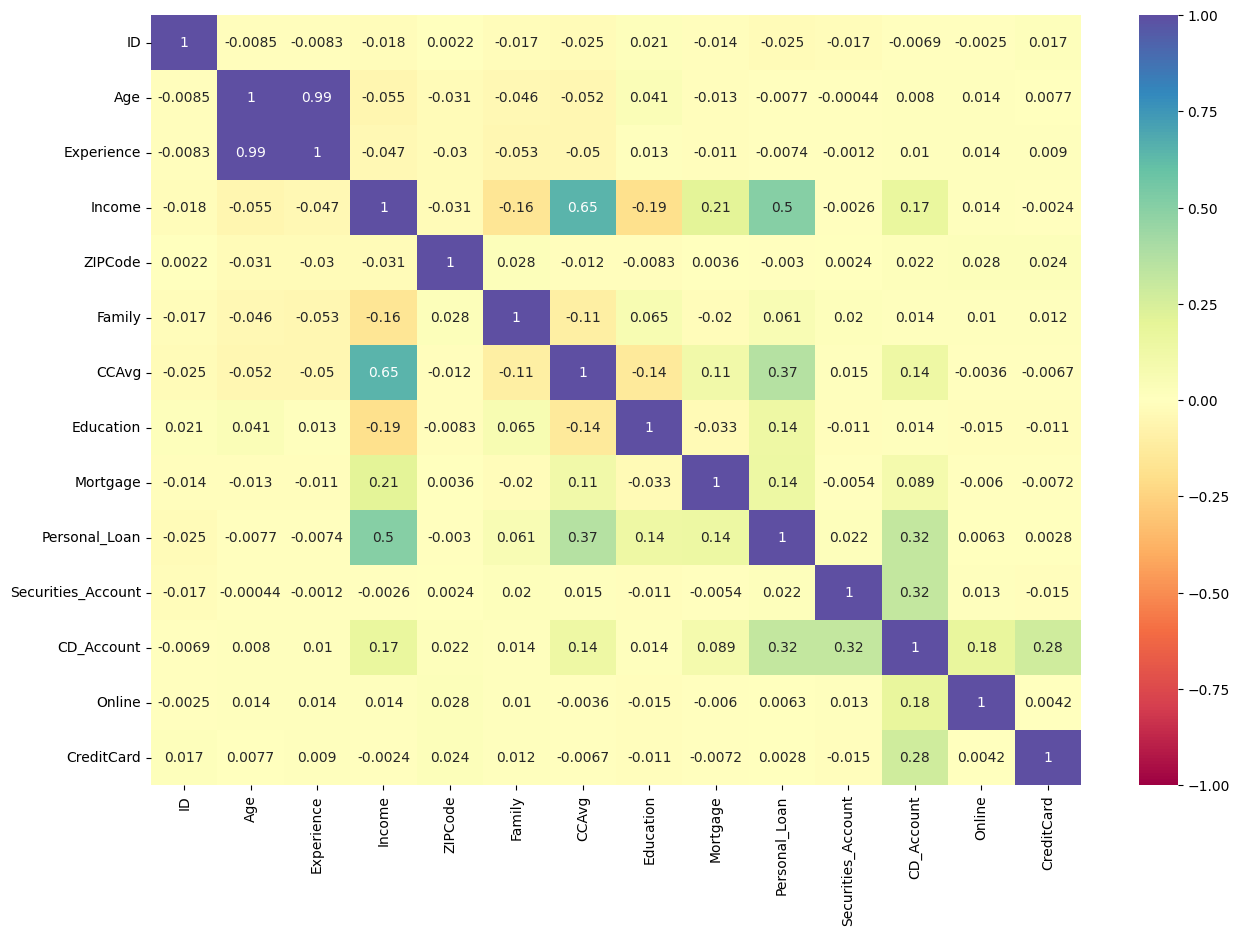

In [9]:
# heatmap to look at the correlations between the numeric variables.

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

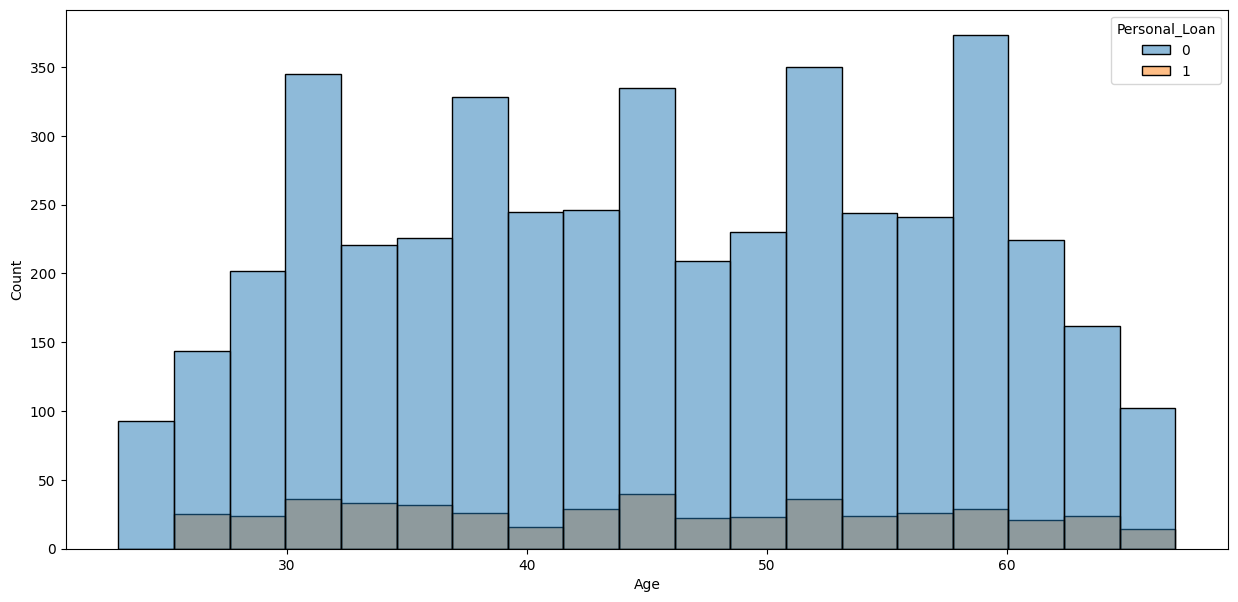

In [10]:
# How does a customer's interest in purchasing a loan vary with their age?
plt.figure(figsize=(15, 7))
sns.histplot(data=df, x="Age", hue="Personal_Loan")

In [11]:
# One hot encode the Education column which

df = pd.get_dummies(df, columns=['Education'], prefix='Education ', prefix_sep='')

In [12]:
# visualizing the new column layout after One Hot Encoding the Education column into 3 columns representing education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Mortgage  \
0   1   25           1      49    91107       4    1.6         0   
1   2   45          19      34    90089       3    1.5         0   
2   3   39          15      11    94720       1    1.0         0   
3   4   35           9     100    94112       1    2.7         0   
4   5   35           8      45    91330       4    1.0         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

   Education 1  Education 2  Education 3  
0            1            0            0  
1            1            0            0  
2            1            0            0  
3            0            1            0  
4            0            1            0

In [13]:
# Checking that the last ID in the dataframe is indeed 5000 with the .tail() method
df.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Mortgage  \
4995  4996   29           3      40    92697       1    1.9         0   
4996  4997   30           4      15    92037       4    0.4        85   
4997  4998   63          39      24    93023       2    0.3         0   
4998  4999   65          40      49    90034       3    0.5         0   
4999  5000   28           4      83    92612       3    0.8         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
4995              0                   0           0       1           0   
4996              0                   0           0       1           0   
4997              0                   0           0       0           0   
4998              0                   0           0       1           0   
4999              0                   0           0       1           1   

      Education 1  Education 2  Education 3  
4995            0            0            1  
4996            1            0            0  
4997            0            0            1  
4998            0            1            0  
4999            1            0            0

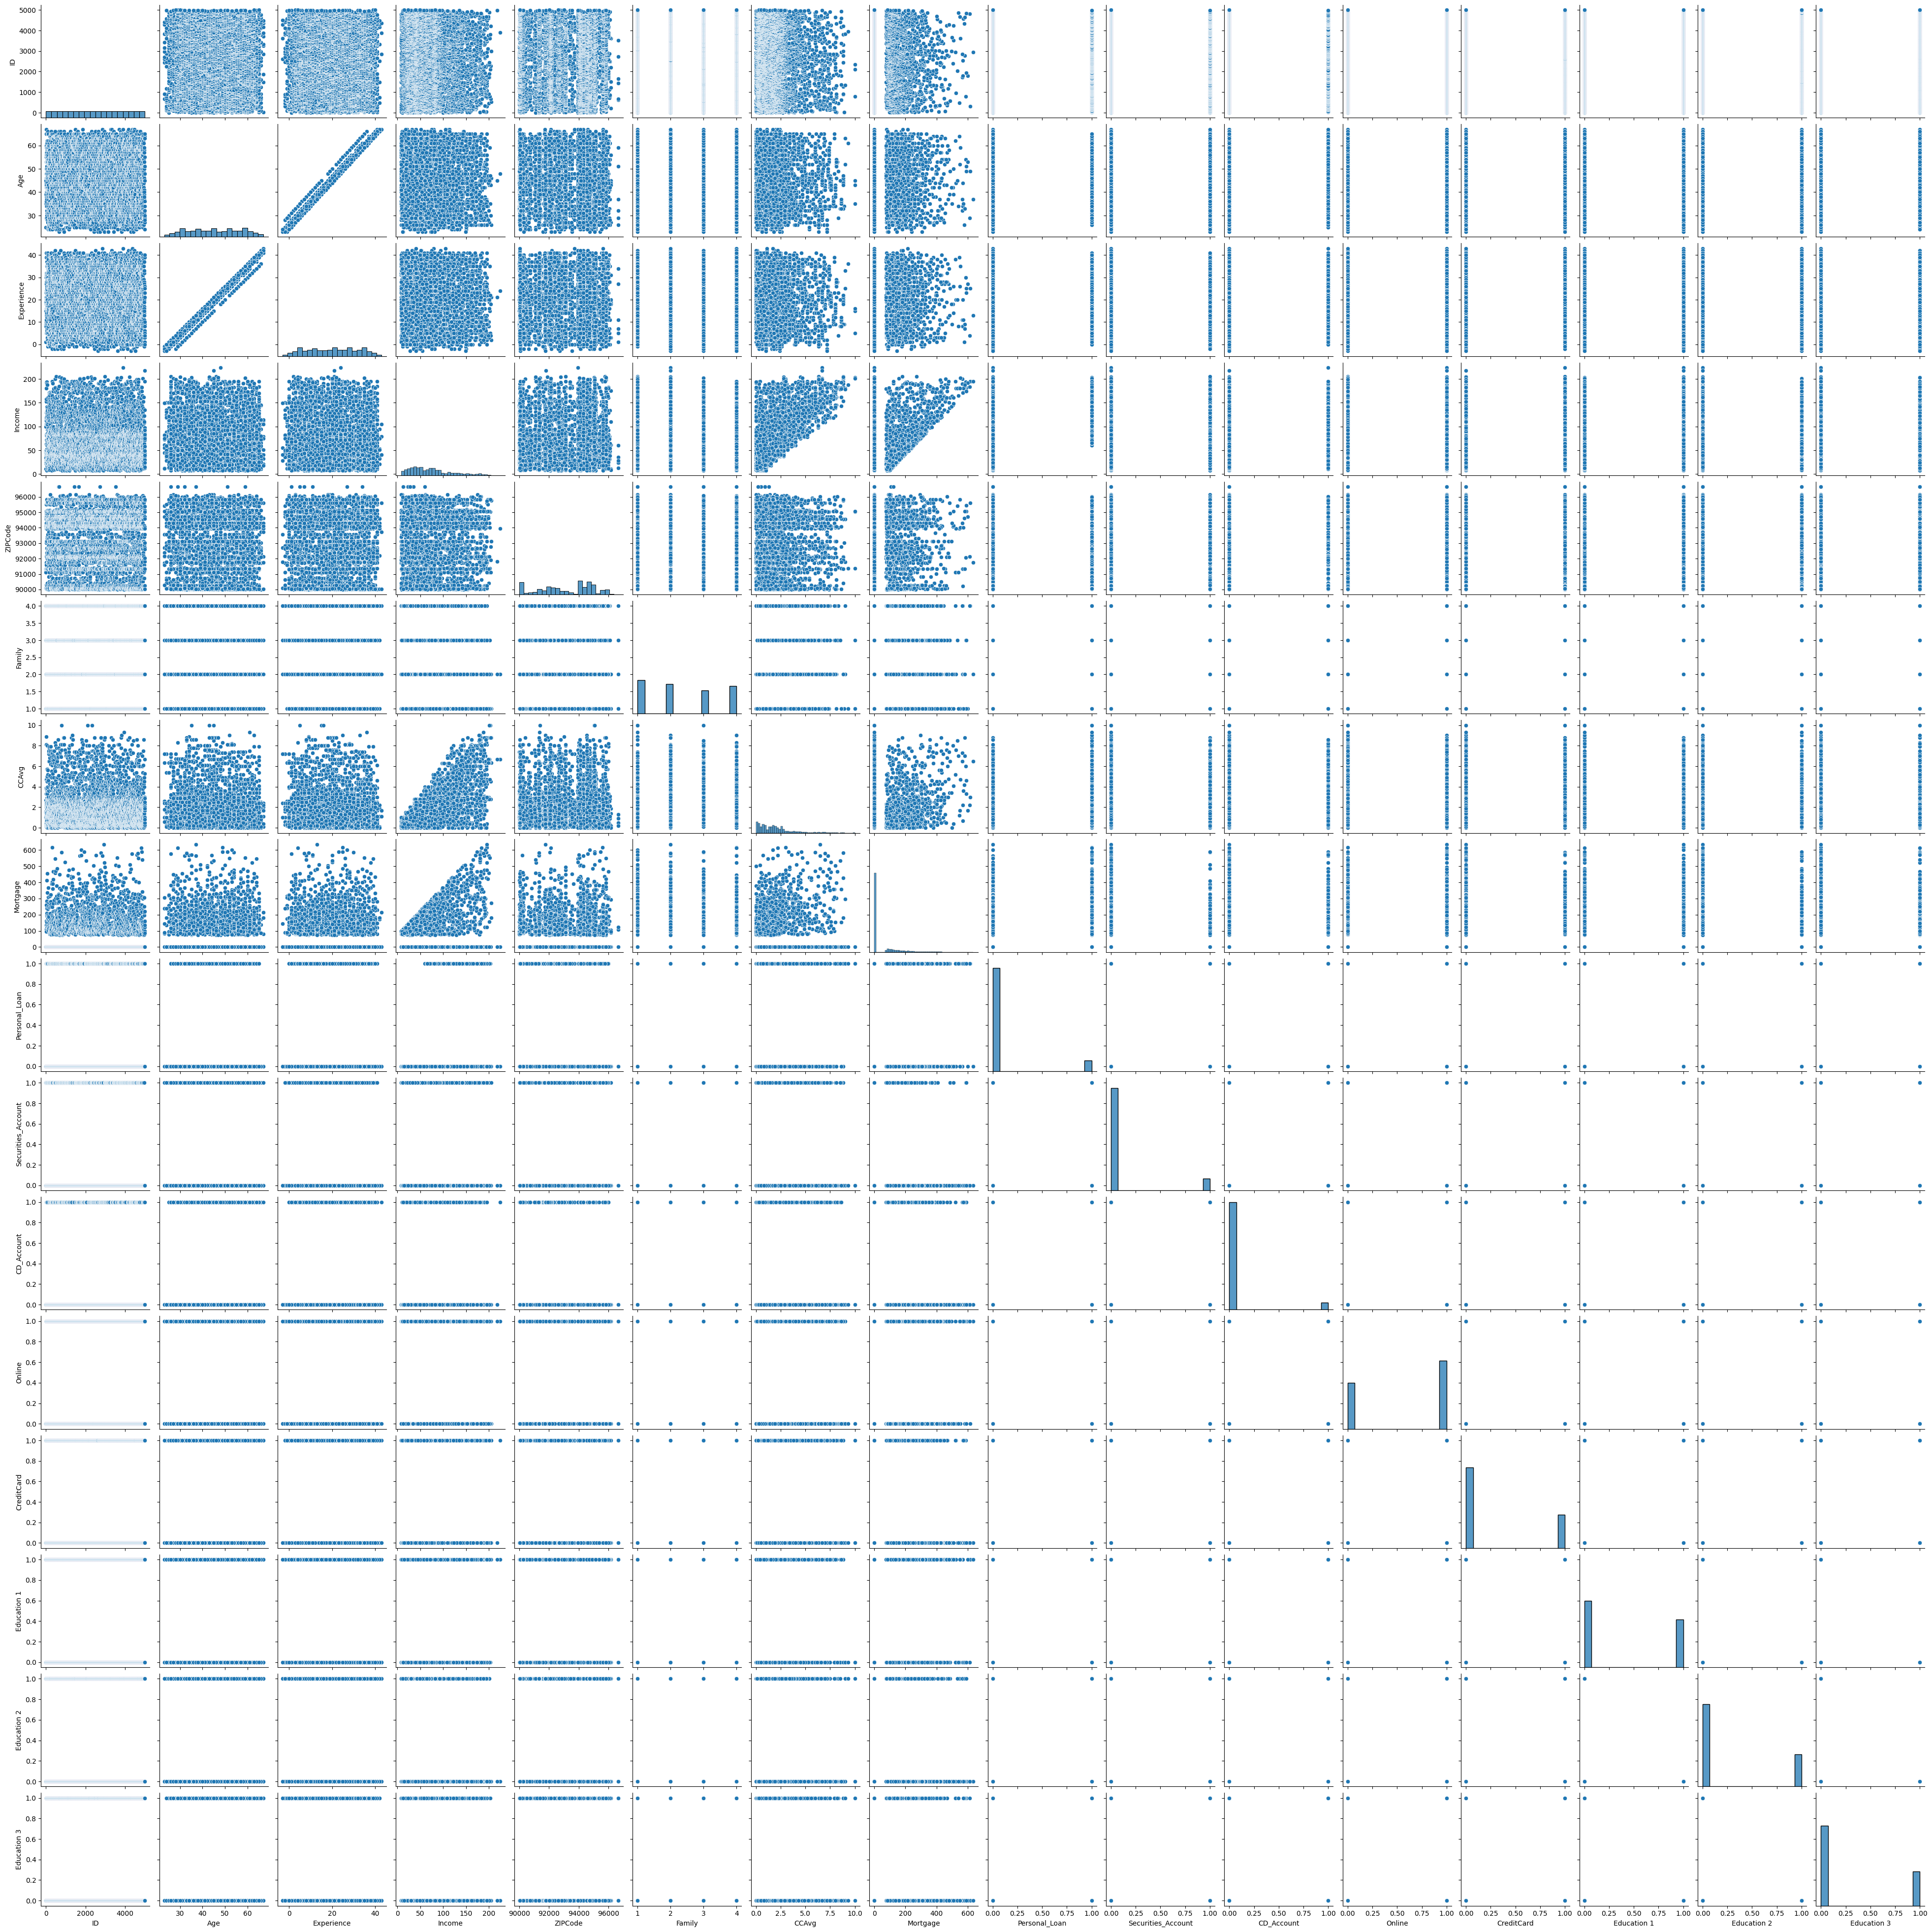

In [14]:
# pairplot showcasing relationship between each numeric column
sns.pairplot(df)
plt.show()

<Axes: xlabel='Income', ylabel='Count'>

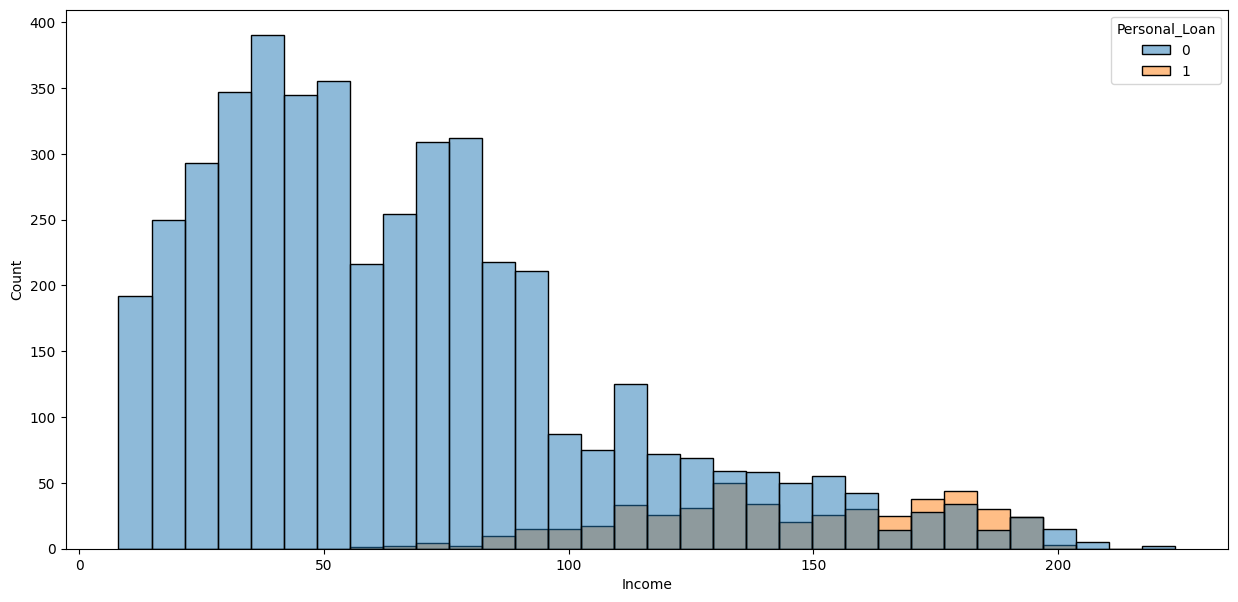

In [15]:
# How does a customer's interest in purchasing a loan vary with their age?
plt.figure(figsize=(15, 7))
sns.histplot(data=df, x="Income", hue="Personal_Loan")

<Axes: xlabel='Education 1', ylabel='Count'>

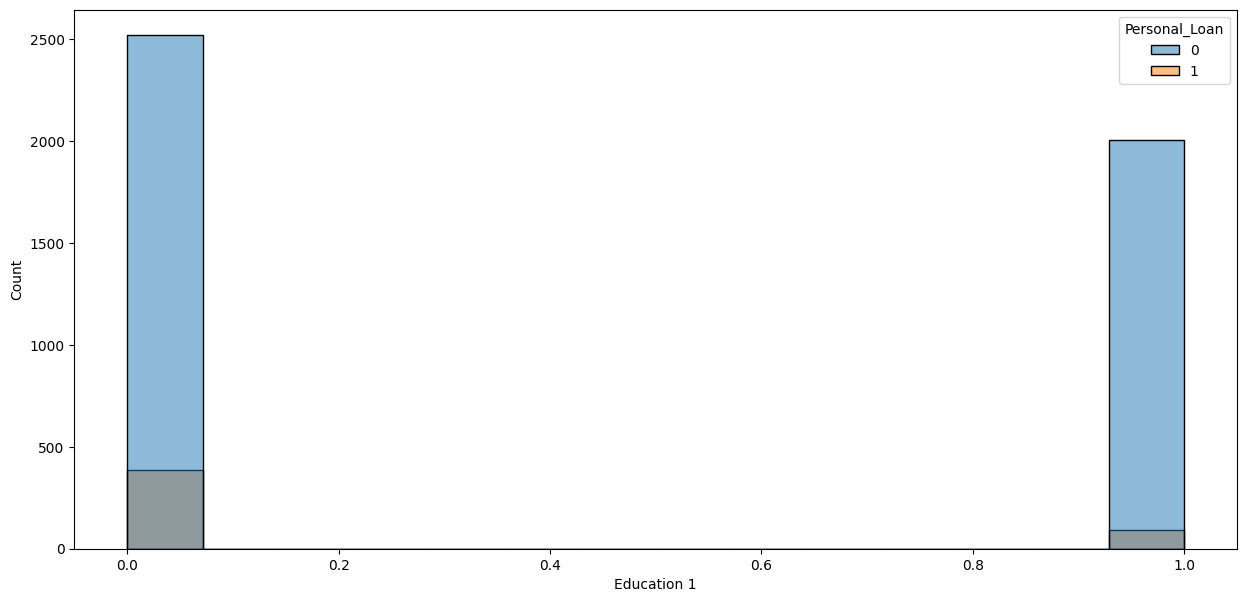

In [16]:
# How does a customer's interest in purchasing a loan vary with their age?
plt.figure(figsize=(15, 7))
sns.histplot(data=df, x="Education 1", hue="Personal_Loan")

<Axes: xlabel='Family', ylabel='Count'>

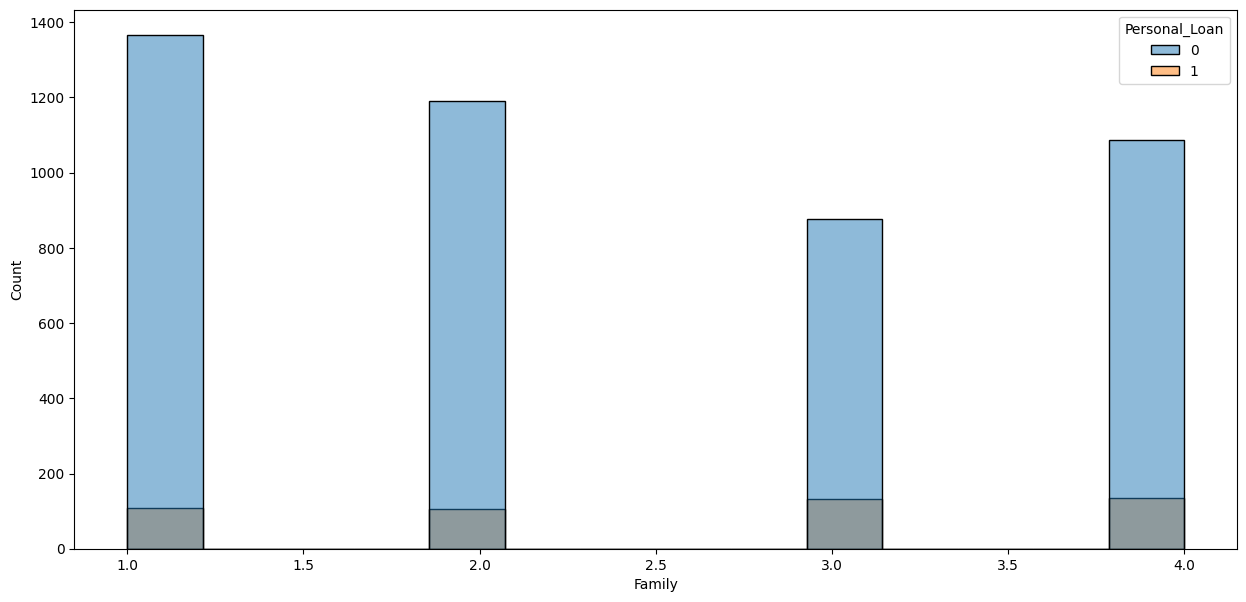

In [17]:
# How does a customer's interest in purchasing a loan vary with their age?
plt.figure(figsize=(15, 7))
sns.histplot(data=df, x="Family", hue="Personal_Loan")

<Axes: xlabel='CCAvg', ylabel='Count'>

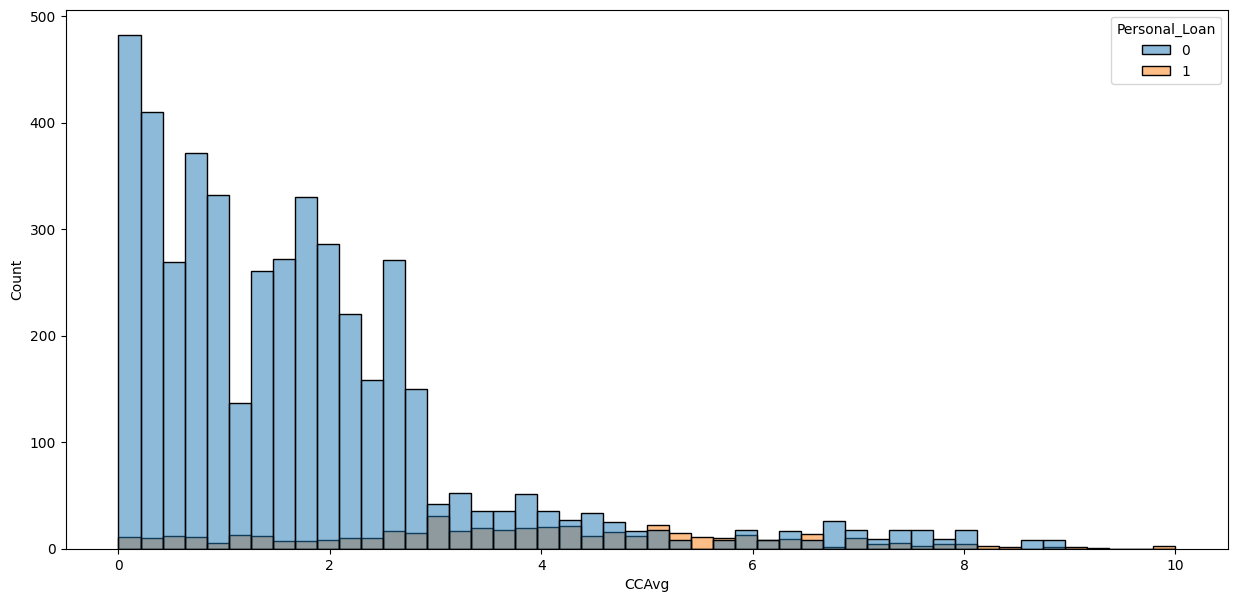

In [18]:
# How does a customer's interest in purchasing a loan vary with their age?
plt.figure(figsize=(15, 7))
sns.histplot(data=df, x="CCAvg", hue="Personal_Loan")

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [19]:
# there are no missing values aside from the dummy values within the 3 Education categories
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Education 1         5000 non-null   uint8  
 14  Education 2         5000 non-null   uint8  
 15  Education 3         5000 non-null   uint8  
dtypes: flo

In [20]:
# checking if experience < 0
df[df["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [21]:
# I have already one hot encoded the Education column

# I will ensure that the experience column does not contain any negative integers by using the absolute value
# Use absolute value of any negative experience integers

df["Experience"] = df["Experience"].abs()

In [22]:
# Confirming that all values for Experience are positive
# checking if experience < 0
df[df["Experience"] < 0]["Experience"].unique()

array([], dtype=int64)

In [23]:
# Next we will ensure the ZIPCode column is ready to be processed. I downloaded a package (uszipcode) to help with the zip code manipulation. Next we will check the unique ZIP code values
df["ZIPCode"].nunique()

467

In [24]:
df["ZIPCode"] = df["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    df["ZIPCode"].str[0:3].nunique(),
)

Number of unique values if we take first two digits of ZIPCode:  57


In [25]:
df["ZIPCode"] = df["ZIPCode"].str[0:3]

df["ZIPCode"] = df["ZIPCode"].astype("category")

In [26]:
# Verifying that we have reduced the zip codes into smaller catergories based on the first three digits which will give us the national area with the first digit and the sectional center or large city post office for the next two digits.
df["ZIPCode"].nunique()

57

In [27]:
# finally we will convert the data types of each categorical column to a "category" type
cat_cols = [
    "Education 1",
    "Education 2",
    "Education 3",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
df[cat_cols] = df[cat_cols].astype("category")

In [28]:
# verifying correct types are now applied
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   category
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
 13  Education 1         5000 non-null   category
 14  Education 2         5000 non-null   category
 15  Education 3         5000 non-null   ca

In [29]:
# Now we will define the quantiles and IQR equation

Q1 = df.quantile(.25)
Q3 = df.quantile(.75)

# Inter Quantile Range (75th perentile - 25th percentile)
IQR = Q3 - Q1

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [30]:
# Next we will look for outliers by searching for outliers below 1.5 times the IQR for all numerical categories
((df.select_dtypes(include=["float64", "int64"]) < lower)
).sum() / len(df) * 100

ID            0.0
Age           0.0
Experience    0.0
Income        0.0
Family        0.0
CCAvg         0.0
Mortgage      0.0
dtype: float64

In [31]:
# Next we will look for outliers by searching for outliers above 1.5 times the IQR for all numerical categories
((df.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(df) * 100

ID            0.00
Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

**Observations**: Income, Credit Card Average, and Mortgage all have high outliers which is expected as there are scenarios in which salaries, home prices, and credit card debt are ultra high compared to the average.

In [32]:
# define data and split into train and test splits
X = df.drop("Personal_Loan", axis=1)
y = df["Personal_Loan"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [33]:
# Verify number of rows in each split
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 4000
Number of rows in test data = 1000


## Model Building

### Model Evaluation Criterion

* A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.




**Objective:**
* Build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

* Predict whether a liability customer will buy personal loans, understand which customer attributes are most significant in driving purchases, and which segment of customers to target more.


### Build Decision Tree Model

**Model building - Decision Tree**
* Define model evaluation criterion
* Build the model and comment on the model performance.
* Visualize the decision rules and important features

In [34]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Model Performance Improvement

### Model performance evaluation

### Model can make wrong predictions as:

1. Predicting a liability customer will not buy personal loans (No Personal_Loan) but in reality the customer would take out a personal loan (Personal_Loan).

* This type of failed prediction can reduce loan sales by failing to advertise to customers that would have taken the offer and taken out personal loans.

2. Predicting a liability customer will take out a personal loan (Personal_Loan) but in reality the customer would not buy personal loans (No Personal_Loan).

* This type of failed prediction can waste marketing spend on customers that will not take a personal loan out.


### Which case is more important?

* If we predict a non-delinquent customer as a delinquent customer bank would lose an opportunity of providing loan to a potential customer.
 * assuming a reasonable marketing cost per person, it would be much worse to miss out on a potential sale then lose the marketing cost of one person that does not take out a loan, as each loan would generate a ton of interest.

### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The make_confusion_matrix function will be used to plot confusion matrix.

In [35]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [36]:
# defining a function to compute a confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [37]:
# Checking against the train data set
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

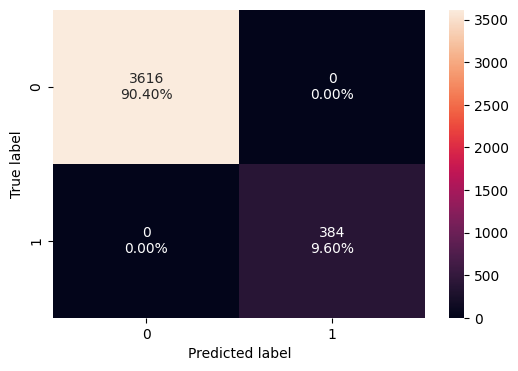

In [38]:
# Checking against the train data set
confusion_matrix_sklearn(model, X_train, y_train)

In [39]:
# Checking against the test data set
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0     0.981  0.958333   0.859813  0.906404

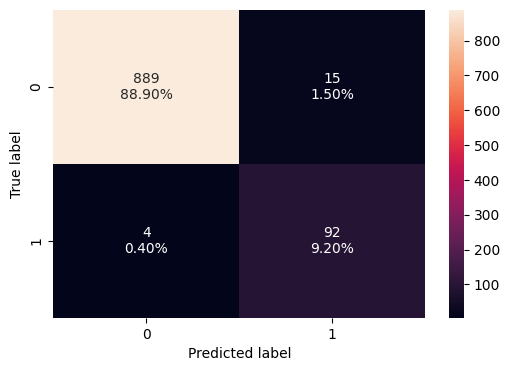

In [40]:
# Checking against the test data set
confusion_matrix_sklearn(model, X_test, y_test)

**Observations**: The model is giving a reasonable result on the test data split that expectedly falls short from the train split results. Let's visualize the decision tree, and then see if we can improve these numbers further!

### Visualize the Decision Tree

In [41]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education 1', 'Education 2', 'Education 3']


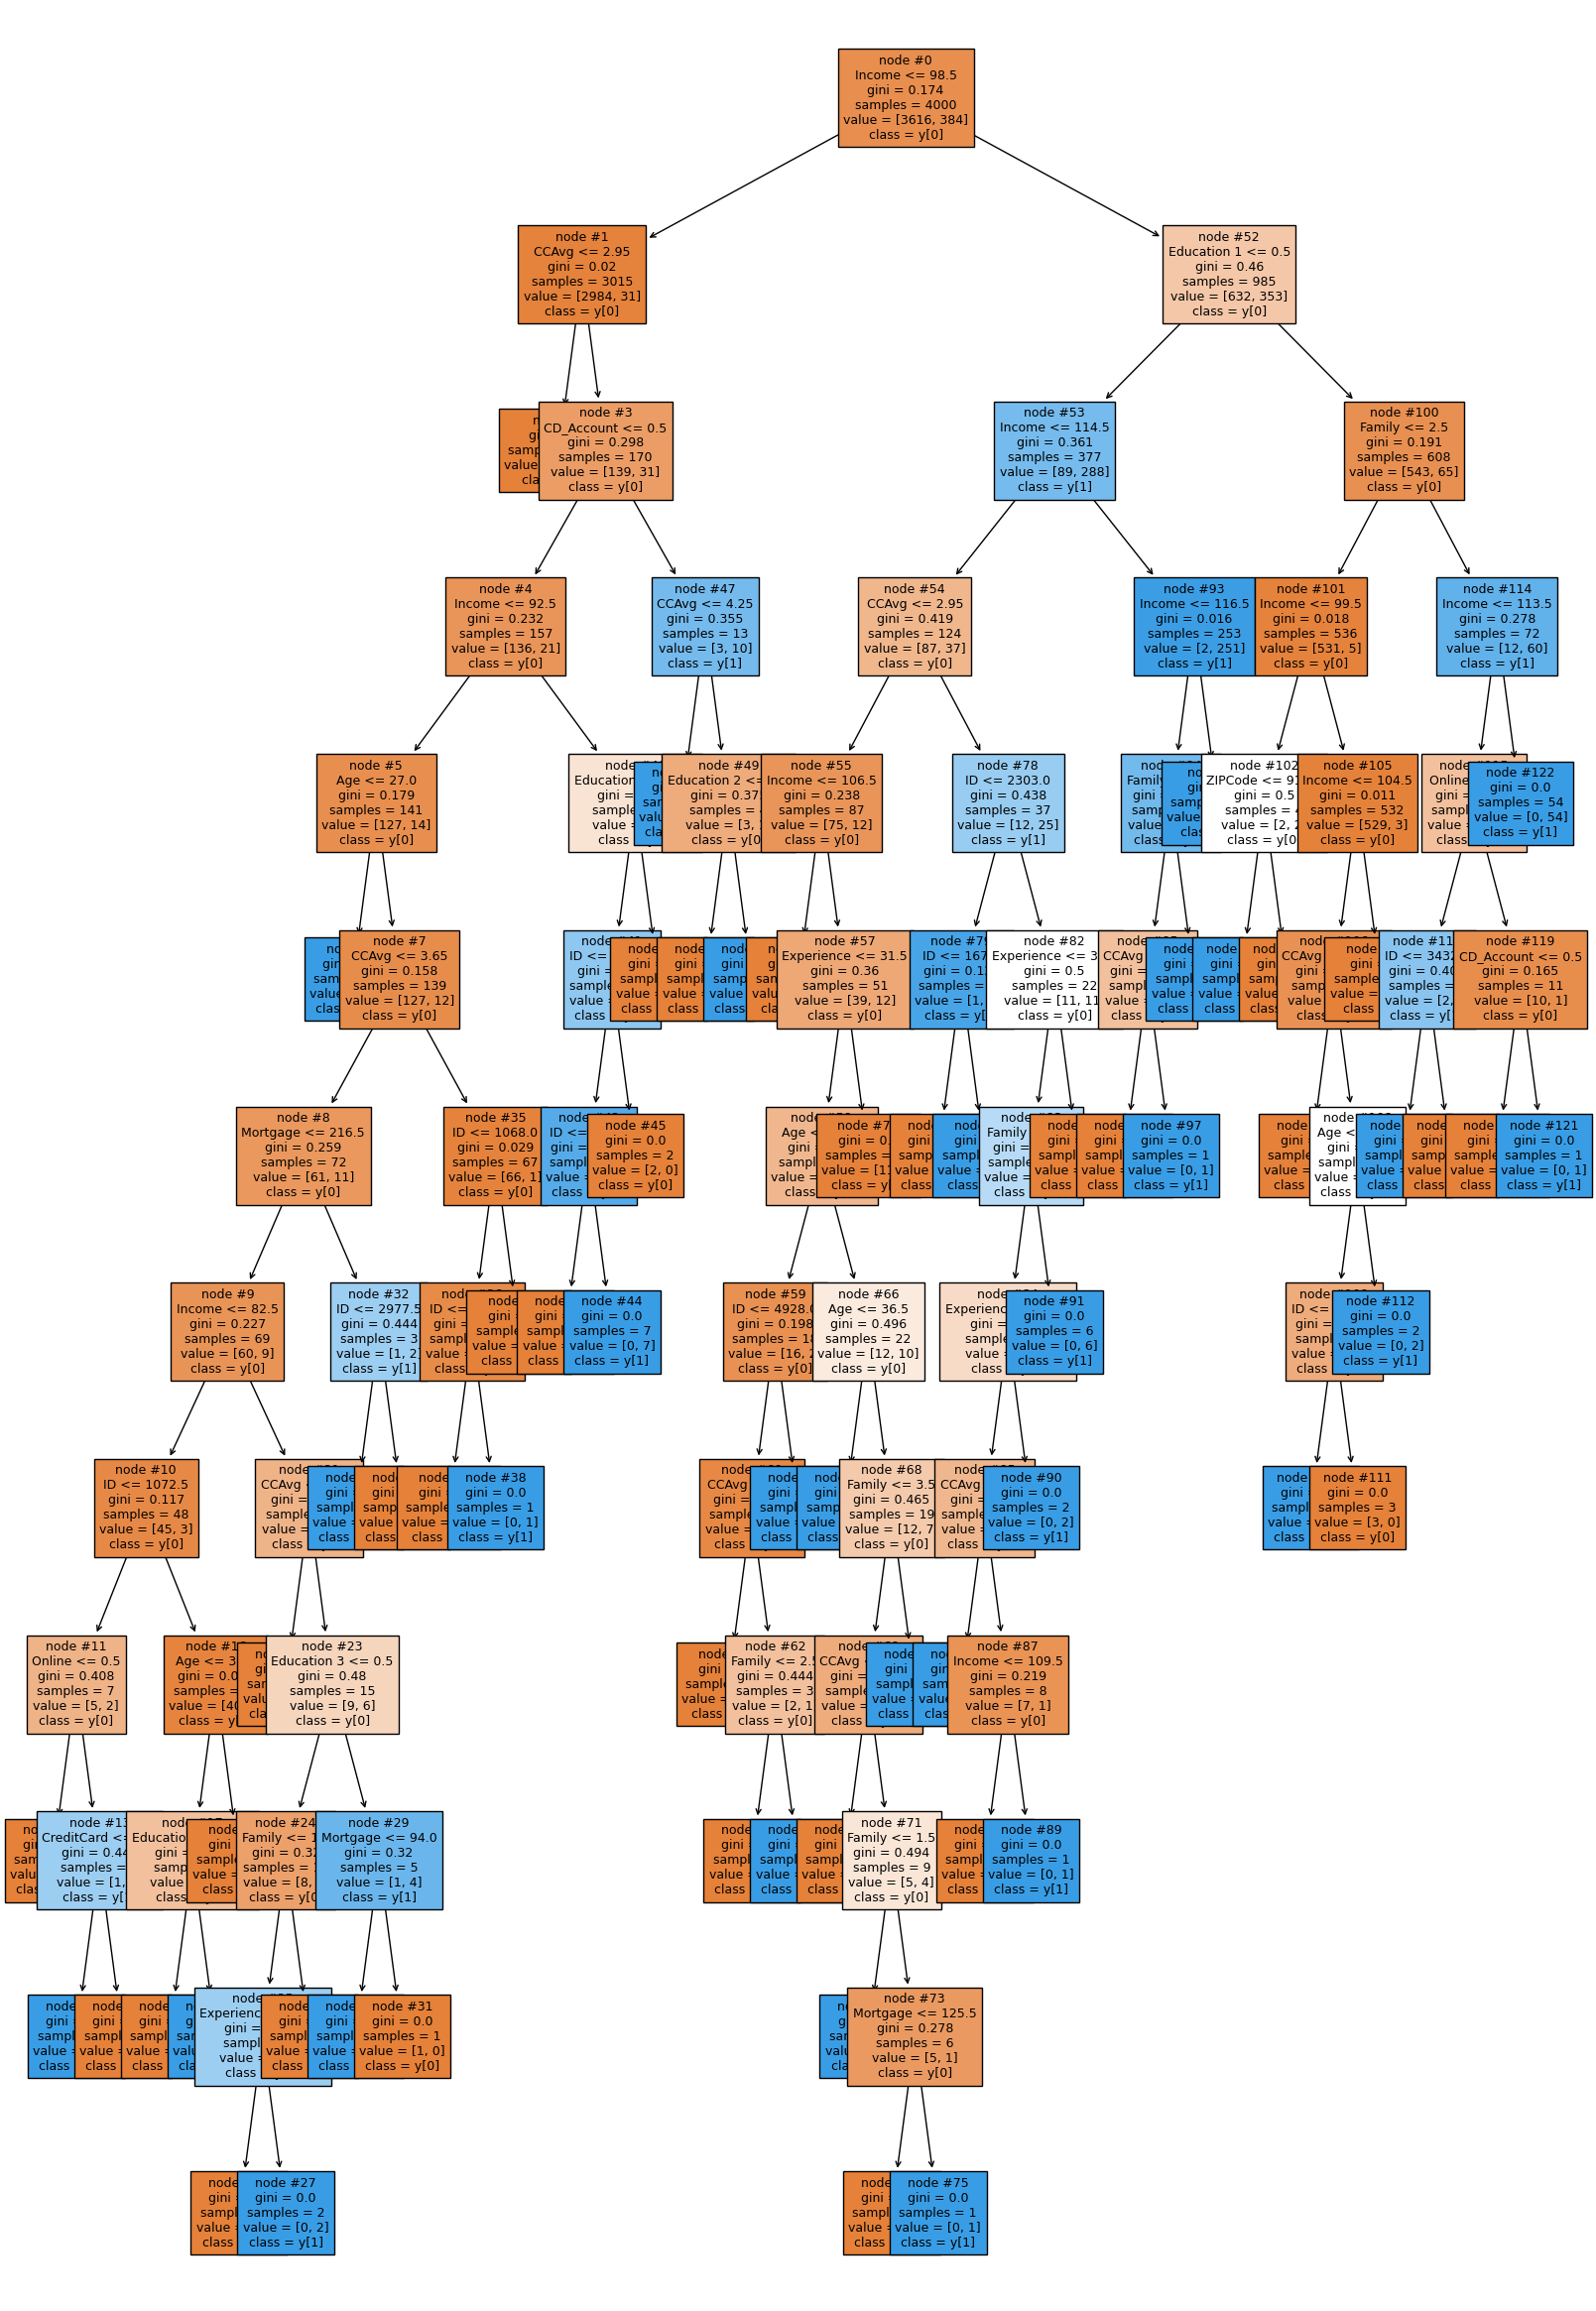

In [42]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [43]:
# Providing a text report showing the rules of a decision tree as well

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 27.00
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |--- Age >  27.00
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- Mortgage <= 216.50
|   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |--- ID <= 1072.50
|   |   |   |   |   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- Online >  0.50
|   |   |   |   |   |   |   |   |   |   |--- CreditCard <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |   |   |   |--- CreditCard >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |-

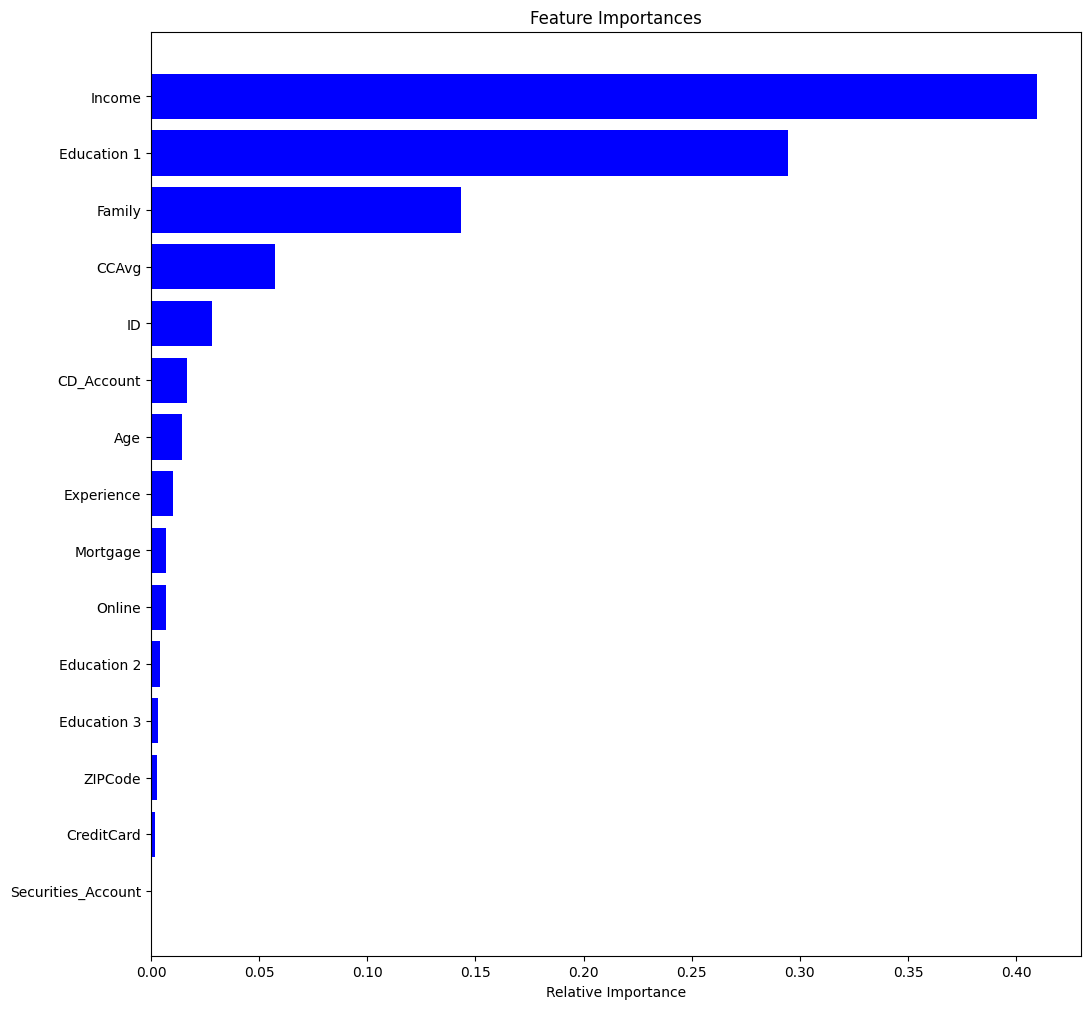

In [44]:
# Barchart of the most important features affecting the models predictions

importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**: Income, completion of Undergraduate education, family, and credit card average are the top 4 important features of this model with income and undergrad education being the most impactful features.

* Improve the model performance by pruning (Both Post and Pre pruning)
* Check the performance of the pruned models, compare the performance of all the models built, and select the final model
* Find the decision rules and check feature importance for the final model

### Decision Tree (Pre-pruning)

#### Using GridSearch for Hyperparameter tuning of our tree model
* Let's see if we can improve our model performance even more.

In [45]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=1e-06,
                       random_state=1)

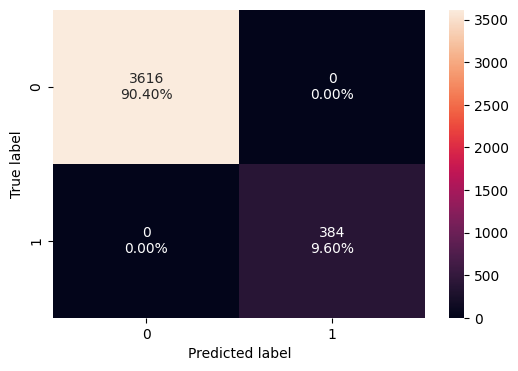

In [46]:
# Checking performance on train set again
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train


confusion_matrix_sklearn(estimator, X_train, y_train)

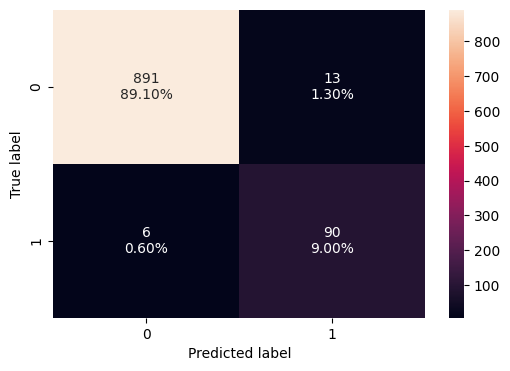

In [47]:
# Checking performance on test set again
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

confusion_matrix_sklearn(estimator, X_test, y_test)

**Observations**:
After hyperparameter tuning the model has become slightly better in overall performance and is now simpler.

* False Negatives have decreased by 4 (29%), however false positives have increased by 1 (25%).
* Total incorrect predictions have decreased by 3 from the original total of 19 to a new total of 16 incorrect predictions.

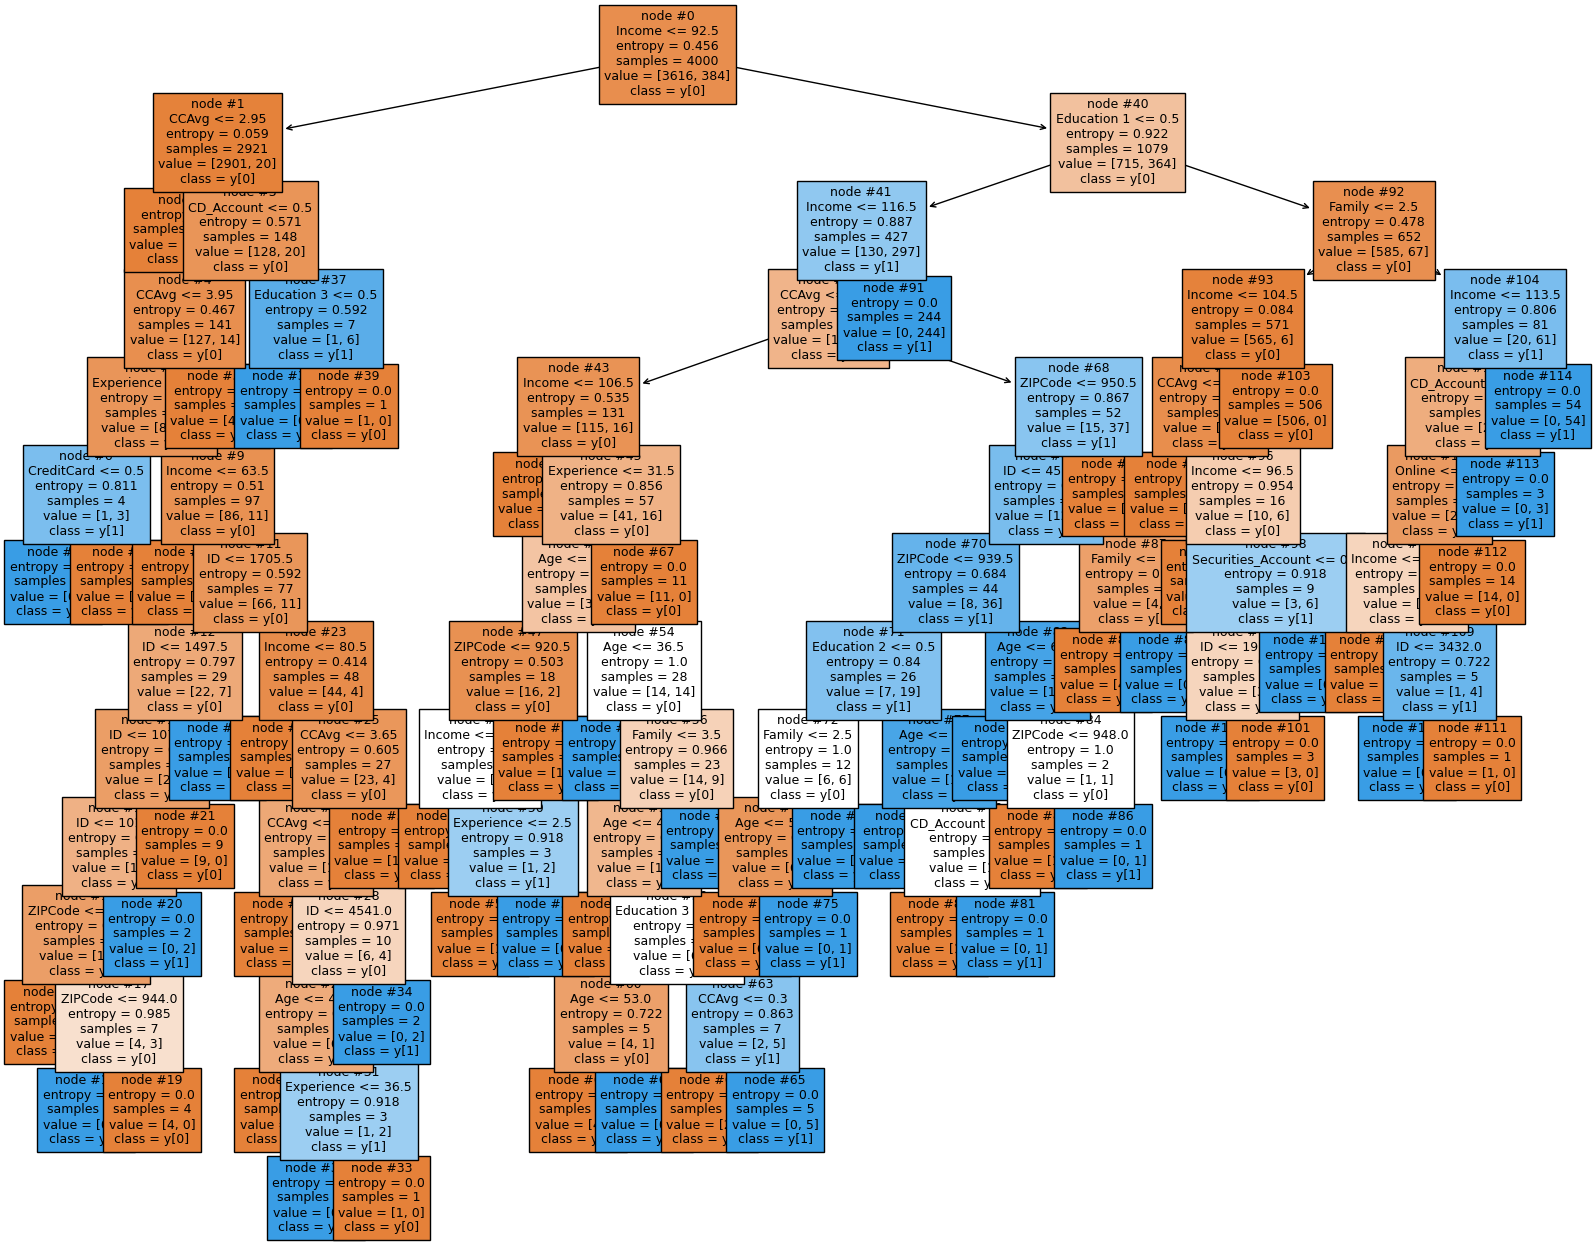

In [48]:
# Visualize the "simplified" decision tree after pre-pruning (It still appears quite complex visually)
plt.figure(figsize=(20, 16))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [49]:
# Now we will perform Cost Complexity Pruning on the model

clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [50]:
# view the total impurity compared to the effective alpha by row

pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000235    0.000471
2     0.000244    0.000958
3     0.000246    0.001451
4     0.000306    0.002369
5     0.000331    0.003361
6     0.000333    0.003695
7     0.000333    0.004028
8     0.000373    0.005520
9     0.000375    0.005895
10    0.000400    0.006295
11    0.000417    0.006711
12    0.000418    0.007130
13    0.000419    0.009646
14    0.000438    0.010084
15    0.000438    0.010521
16    0.000455    0.010976
17    0.000467    0.011442
18    0.000493    0.012428
19    0.000510    0.013448
20    0.000542    0.014532
21    0.000550    0.016731
22    0.000584    0.017315
23    0.000613    0.017928
24    0.000646    0.019219
25    0.000714    0.019934
26    0.000779    0.020713
27    0.000823    0.021535
28    0.000831    0.022367
29    0.000837    0.023204
30    0.000870    0.024945
31    0.002424    0.027369
32    0.002667    0.030036
33    0.003000    0.033036
34    0.003753    0.036789
35    0.020023    0.056812
36    0.021549    0.078361
37    0.047604    0.173568

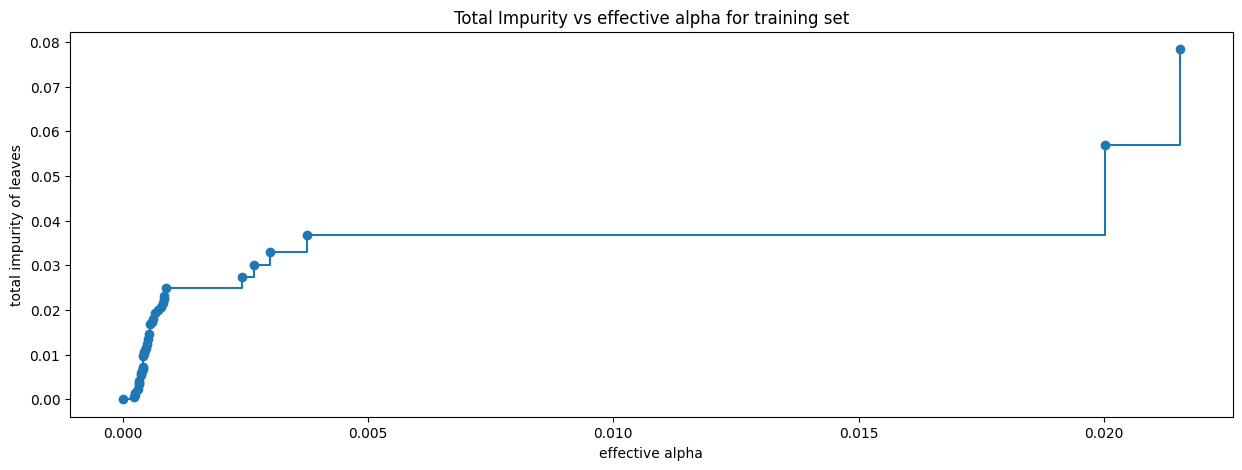

In [51]:
# view graph of the total impurity compared to the effective alpha
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [52]:
# train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04760359071815693


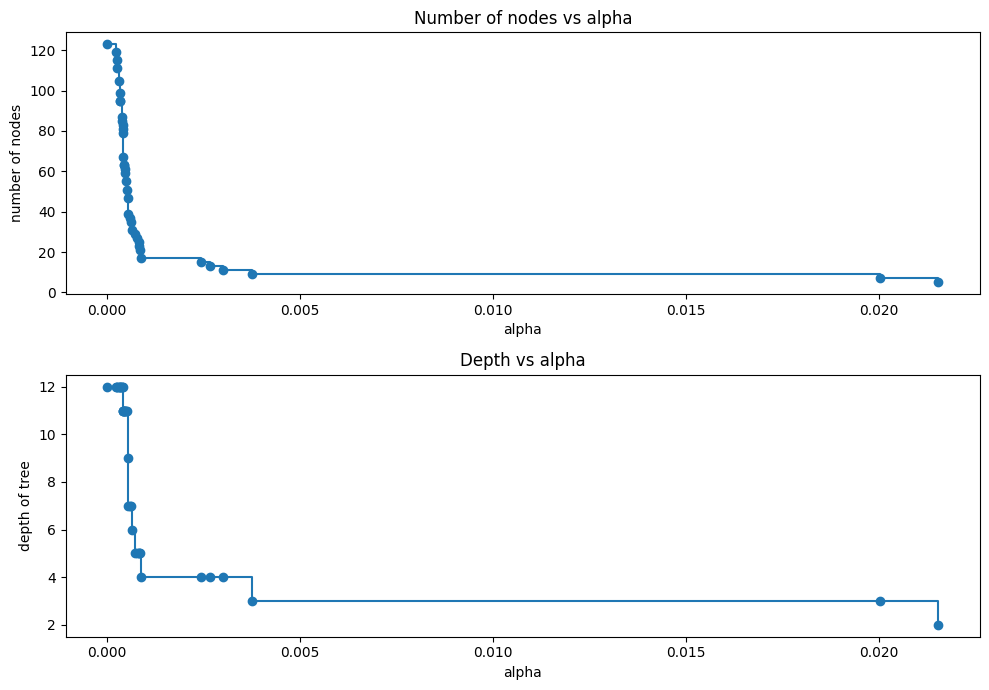

In [53]:
# graph showing that the number of nodes and tree depth decreases as alpha increases.

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Recall vs alpha for training and testing sets

In [54]:
# recall score for train split

recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [55]:
# recall score for test split

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

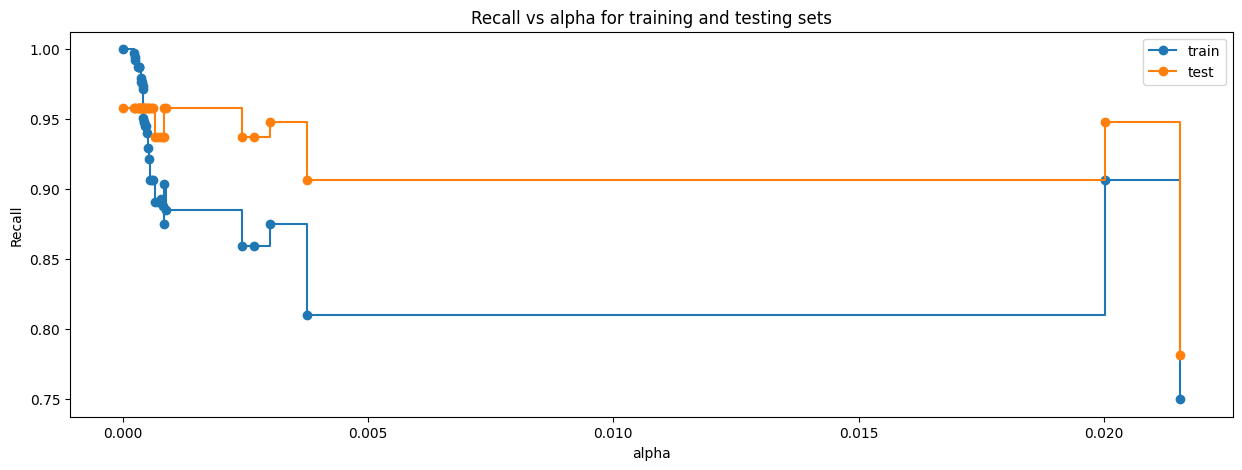

In [56]:
# graph showing recall vs alpha for training and testing sets
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [57]:
# creating the model where we get highest train and test recall

index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


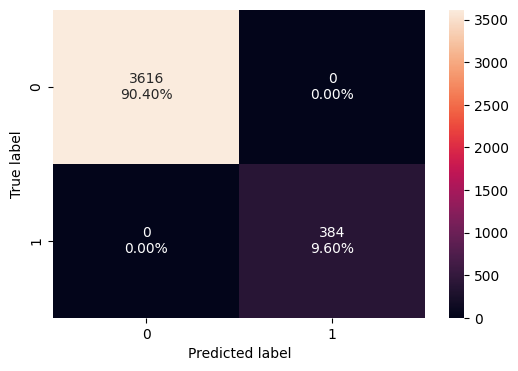

In [58]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

confusion_matrix_sklearn(best_model, X_train, y_train)

In [59]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

Accuracy    Recall  Precision        F1
0     0.981  0.958333   0.859813  0.906404

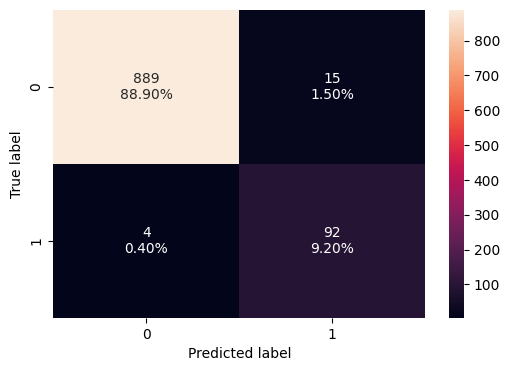

In [60]:
confusion_matrix_sklearn(best_model, X_test, y_test)

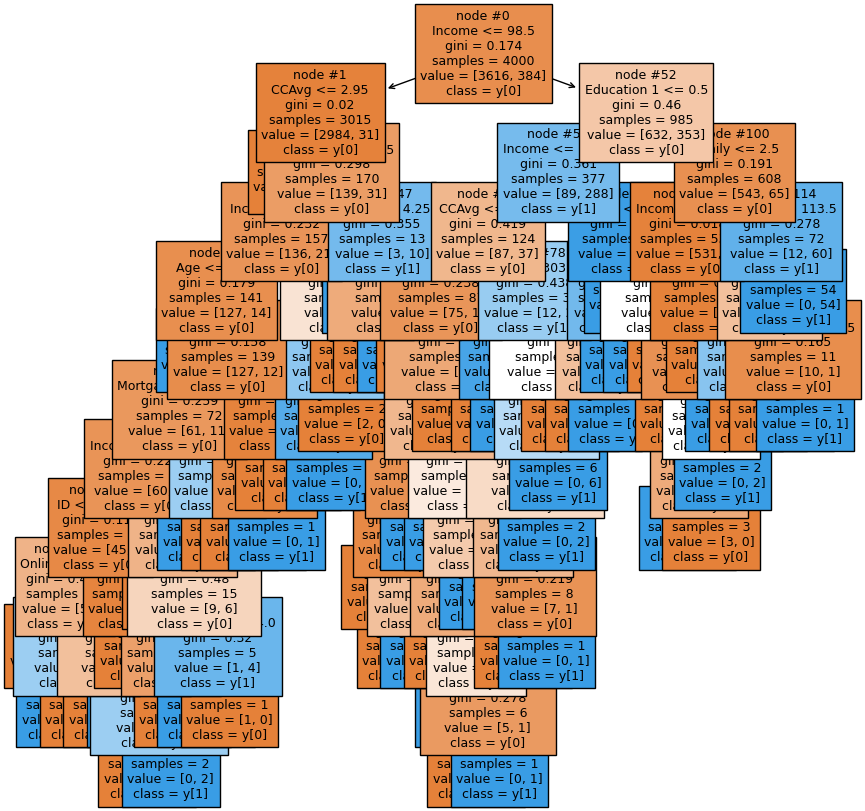

In [61]:
# visualize the post pruned decision tree, the simplest tree thus far
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [62]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.409493
Education 1         0.294670
Family              0.143337
CCAvg               0.057158
ID                  0.028183
CD_Account          0.016585
Age                 0.014133
Experience          0.010031
Mortgage            0.007087
Online              0.006984
Education 2         0.004081
Education 3         0.003457
ZIPCode             0.002881
CreditCard          0.001920
Securities_Account  0.000000


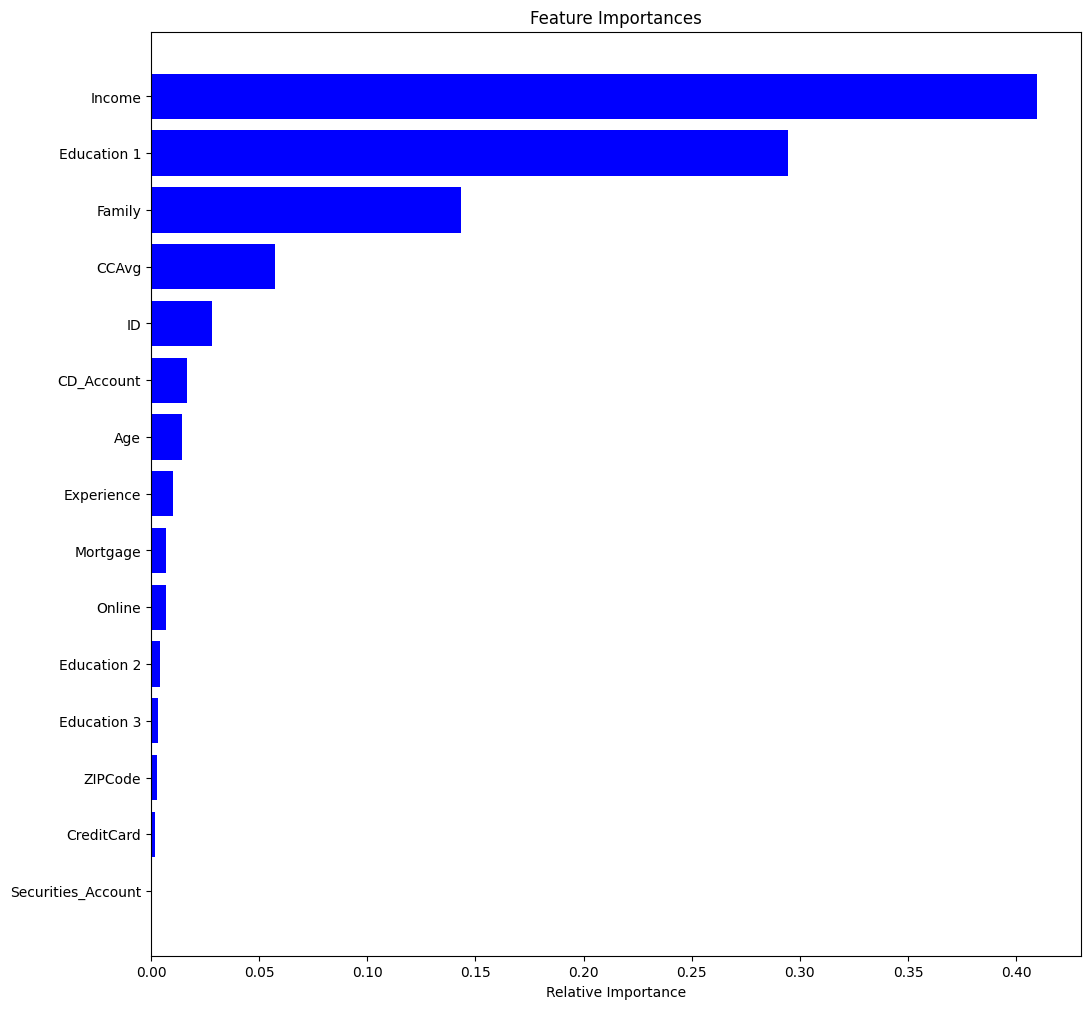

In [63]:
# Barchart of the most important features affecting the models predictions

importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**: Income, completion of Undergraduate education, family, and credit card average remain as the top 4 important features of this model

## Model Comparison and Final Model Selection

In [64]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                     1.0                          1.0   
Recall                       1.0                          1.0   
Precision                    1.0                          1.0   
F1                           1.0                          1.0   

           Decision Tree (Post-Pruning)  
Accuracy                            1.0  
Recall                              1.0  
Precision                           1.0  
F1                                  1.0

In [65]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.981000                     0.981000   
Recall                  0.958333                     0.937500   
Precision               0.859813                     0.873786   
F1                      0.906404                     0.904523   

           Decision Tree (Post-Pruning)  
Accuracy                       0.981000  
Recall                         0.958333  
Precision                      0.859813  
F1                             0.906404

* Technically the pre-pruning decision tree has the best results by accuracy, precision, and F1 score, however it actually has an increase in the number of false negative predictions (loss of a personal loan sale due to not advertising to them!) This would be a larger loss in revenue than the few extra advertisements being sent out and not leading to personal loan sales.
* With post-pruning we are still getting good and generalized model performance on both training and test set, however it does not have the maximum performance increase. This model does have the highest recall score which is critical in this case and overall is a simpler light-weight model with similar results and the lowest false negatives.
* The recall has improved after performing post-processing.

**Final model selection will be the post-pruned decision tree model**

* Reasoning is both the lighter-weight model and the risk reward scenario is maximised here by maximising the recall score and reducing false negatives, one additional missed personal loan sale is worse than 4 additional marketing ads sent out that do not lead to a personal loan purchase.

## Actionable Insights and Business Recommendations


* Key takeaways for the marketing team
* What would your advice be on how to do this campaign?

* **Recommedations:**
* Key clients to market to are going to be those with higher income, at least undergrad education, and a family. These will be the bread and butter for personal loan sales
 * an income of 75k+ has an increased chance of taking out a personal loan
 * an education of undergraduate at least has an increased chance of taking out a personal loan
 * families, specifically larger families have a higher chance of taking out personal loans
 * customers with a credit card average of 5k+ have an increased likelihood of taking out a personal loan
* Remember that a lost customer due to lack of advertising is worse than 4 wasted ads. Review this information to give proof to any SVP to secure an increased advertising budget directed towards the most likely customers to maximize personal loan sales and increase total revenue through interest.

___

An analysis by Jonathan Korstad performed 2/29/2024